#### Navid Al-Musabbir 1721853042
#### Md. Rubel Rana 1712661642

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

### Dataset Import

In [2]:
data = 'dataset/Boro/boro.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
0,2,36600,1970,41.700000,24.800000,206.333333,73.000000,1.466667,4.166667,7.133333,20,33825,0.924180
1,3,167445,1970,34.333333,24.933333,170.333333,81.666667,3.700000,5.200000,6.633333,6,201390,1.202723
2,4,187455,1970,35.233333,25.233333,150.000000,92.000000,1.666667,2.966667,6.435354,10,184035,0.981756
3,5,179600,1970,36.166667,25.333333,171.000000,77.666667,2.266667,4.700000,7.766667,9,167805,0.934326
4,6,13350,1970,36.866667,24.366667,134.333333,67.000000,0.900000,3.166667,6.500000,37,9220,0.690637


In [5]:
df.tail()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
746,14,180726,2013,39.700000,24.633333,139.000000,75.333333,2.366667,4.233333,5.933333,20,315647,1.746550
747,15,18759,2013,36.333333,23.933333,266.000000,77.333333,2.000000,4.666667,5.833333,63,33762,1.799776
748,16,331530,2013,36.500000,23.833333,275.000000,77.666667,2.366667,5.366667,5.600000,34,630965,1.903191
749,17,170795,2013,37.400000,23.466667,639.000000,78.000000,3.366667,6.066667,4.933333,35,220277,1.289716
750,18,410639,2013,37.166667,24.433333,188.666667,76.666667,2.400000,4.600000,5.000000,10,752333,1.832103


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     751 non-null    int64  
 1   Area         751 non-null    int64  
 2   Year         751 non-null    int64  
 3   Max_Temp     751 non-null    float64
 4   Min_Temp     751 non-null    float64
 5   Rainfall     751 non-null    float64
 6   Humidity     751 non-null    float64
 7   Wind         751 non-null    float64
 8   Cloud        751 non-null    float64
 9   Sunshine     751 non-null    float64
 10  ALT          751 non-null    int64  
 11  Productions  751 non-null    int64  
 12  PPH          751 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 76.4 KB


In [7]:
df= df[df['Area'] != 0]
df= df[df['Productions'] != 0]

In [8]:
#defining response and predictor variables
X = df[['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = df[['PPH']]

### Checking number of principal components and MSE

In [9]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [10]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

In [11]:
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

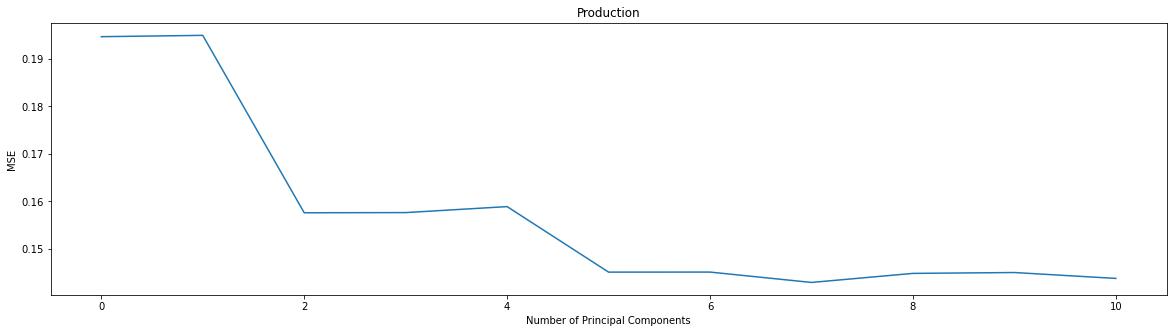

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Production')

In [13]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 28.98,  47.07,  60.88,  69.68,  77.88,  83.27,  87.41,  91.51,
        94.84,  97.78, 100.01])

In [14]:
#spliting the dataset
rng = np.random.RandomState(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=rng)

In [15]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [16]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression()

In [17]:
pred = regr.predict(X_reduced_test)
print("MSE =", np.sqrt(mean_squared_error(y_test, pred)))

MSE = 0.6542022494320369


In [18]:
print("MAE =", mae(y_test, pred))

MAE = 0.2854444367428546


### PCR RMSE, R Squared, MAE Values using 10th component

In [37]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=10), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']

In [38]:
#calculating RMSE
pcr.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pcr.predict(scale(X_test)))))

RMSE = 0.6080496905166208


In [39]:
#calculating R2
pcr.fit(X_train, y_train)

print("R2 =", pcr.score(X_test, y_test))

R2 = 0.145687086364493


In [40]:
#calculating MAE
pcr.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pcr.predict(scale(X_test))))

MAE = 0.19083131549341045


### Plot

plt.figure(figsize=(15,10))
plt.scatter(pcr.predict(scale(X_train)), y_train, alpha=.3, label="Train samples")
plt.scatter(pcr.predict(scale(X_test)), y_test, alpha=.3, label="Test samples")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
#plt.plot([30, 400], [30, 400], c='k', zorder=0)
plt.show()

### Checking number of principal components and MSE

In [41]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
n = len(X)

In [42]:
for i in np.arange(1, 12):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

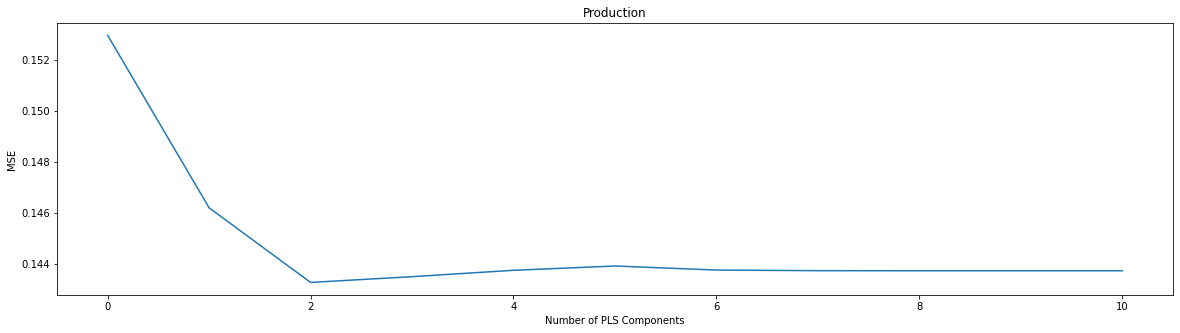

In [43]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Production')

### PLSR RMSE, R Squared, MAE Values Using 3rd Component

In [64]:
#calculating RMSE
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))

RMSE = 0.6067605194261556


In [65]:
#calculating R2
pls = PLSRegression(n_components=3)
pls.fit((X_train), y_train)

print("R2 =", pls.score(X_test, y_test))

R2 = 0.14873283040745566


In [66]:
#calculating MAE
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pls.predict(scale(X_test))))

MAE = 0.1861004494038076


### Plot

pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)

plt.figure(figsize=(15,10)) 
plt.scatter(pls.transform(X_test), y_test, alpha=.3, label="Train samples") 
plt.scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3, label="Test samples")  
plt.xlabel("Predicted value") 
plt.ylabel("True value") 
plt.legend() 
plt.show()